# COGS 108 - Final Project (change this to your project's title)

<b>Please use collection time: Friday</b>

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Because each economic sector is affected differently by inflation, our group set out to find the correlation, if any, between inflation rates and gas prices in the United States and California, utilizing weekly historical data of gas prices from the US Energy Information Institute, and monthly data of inflation rates from the US Bureau of Labor Statistics. We also set out to use this data to compare the gas prices in the US and California, because of the historical differences between the two, and how similarly either were affected by inflation. 

Our null hypothesis was that there would be no correlation for both California and the US, while our alternative hypothesis was that there would be a correlation for both. Through the process of data cleaning, we isolated desired data columns which consisted of the gas prices and inflation rates. We then conducted two statistical analysis's on the variables of: 1) California gas prices and inflation rates and 2) United States gas prices and inflation rates. After these processes, can conclude that there is indeed a correlation between inflation and gas prices. More specifically, we found that gas prices in the entire US and the inflation rate had a correlation coefficient of 0.328, and a P-value of 3.35e-31, and for California, the correlation coefficient was 0.47 and P-value of 2.23e-66. These results indicate that there is in fact a moderately strong correlation between California and US gas prices and inflation, and the low P-values allow us to reject the null hypothesis.

# Names

- Gideon Chan
- Nancy Jiang
- Elliot Kim
- Harrison Nguyen
- Jose Mateo

<a id='research_question'></a>
# Research Question

How do the gas prices of California and the United States correlate with the inflation rate?

<a id='background'></a>

## Background & Prior Work

Because most of us drive cars as our primary way of transportation, gasoline prices are of a great relevance to us. As we are all current residents of California, we are interested in how the gasoline prices near us relate to the rest of the United States. We are also interested to see how the trends of the gas prices compare between California and the United States as a whole. It is notable that gas prices have been increasing as time passes, so we wanted to see if the comparison shows correlation or if they are separate. 

"A surge in demand for gasoline is one contributing factor that is escalating prices [in California]" (1). News articles are noting an increase of gas prices based on demand in California. They say that a contributer to the increasing demand is the extreme weather conditions in California. Since the extreme weather conditions pertain to only in California, the increase in demand and thus the increase in gas prices suggest that there is some separation between the correlation of gas prices between California and the United States as a whole. 

It is well known that the gas prices in California are much higher than the national average. According to PBS, "consumers in California were paying roughly \\$2.61 per gallon more than the national average for gas. The average there is about \\$6.15 a gallon now." (2). In this discussion with Professor Severin Borenstein of UC Berkeley, Professor Borenstein points out some differences between California and the rest of the country. For example, he notes that California has higher gas taxes than the rest of the country, and that it uses a clearner-burning gasoline that costs a little more to make. However, a question that is raised during the discussion is that there is some uncertainty as to where money is going. The increase in California's gas prices "have averaged an extra 30 cents a gallon higher than the rest of the country, beyond what you can explain through higher taxes and fees." (2). There are some uncertainties as to why California's gas prices are increasing more than the rest of the United States. This is an interesting statement to note, and can be verified through our project's models. 

It is also important to consider inflation when looking at gas prices, since there may be a correlation between the two. An infographic from TitleMax (3) gives a visualization of gas prices but adjusts them for inflation. We can see that the prices are steadier than what we can experience without considering inflation, but we still see a gradual increase in the past 20 or so years. 


References:
1. https://www.sacbee.com/news/california/article271522417.html
2. https://www.pbs.org/newshour/show/why-gas-prices-are-so-much-higher-in-california-and-how-the-state-is-reacting
3. https://www.offgridweb.com/transportation/infographic-a-history-of-gas-prices-adjusted-for-inflation/

# Hypothesis


Null hypothesis(H0): There is no relationship between the inflation rate and the trends of the U.S. and California gasoline prices.

Alternative hypothesis(H1): There is correlation between the inflation rate and the trends of the U.S. and California gasoline prices.

We speculate that there is a positive correlation between the inflation rate and trends of the gas prices of California and the United States. The reason is that we observed the gas price of California is much higher in those two years, and the annual inflation rate is about 6.5.

# Dataset(s)

- Dataset Name: Weekly U.S. Retail Gasoline Prices
- Link to the dataset:https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m
- Number of observations: 1561

This dataset contains weekly U.S. retail gasoline prices including all grades and all formulations. It contains 1561 gasoline price data range from 1993-04-05 to 2023-02-27

- Dataset Name: Weekly California Gasoline Prices
- Link to the dataset:https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_sca_dpg&f=w
- Number of observations: 1189

This dataset contains weekly California retail gasoline prices including all grades and all formulations(dollars per gallon). It contains 1189 gasoline price data range from 2000-05-22 to 2023-02-27.

Since the annual and monthly U.S. and California dataset do not have enough data to train the model, so we pick the weekly dataset. We gonna merge those two dataset with exact weekly date, to see how the price shift.

- Dataset Name: All items less food and energy in U.S. city average, all urban consumers, not seasonally adjusted
- Link to the dataset: https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths
- Number of observations: 278

This dataset contains the inflation in the U.S., counted monthly from 2000 to 2023. The values types of the inflation is percentage. Since this dataset only contains inflation by month rather than by week from 2000 to 2023, we will just apply the inflation to each entries respective month and year.


# Setup

In [59]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
import patsy

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_9908\4192345466.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Data Cleaning

Those two datasets are in xlw format, and we need to read each dataset into a dataframe with only the spreadsheet of weekly gasoline prices. Then we match those two dataset with exact same weekly date, so it's fair when we compare the two models after we train them. After we merge the datasets, we extract year and month from the original date, so we can have a better understanding of the data.

In [19]:
df_ca = pd.DataFrame(pd.read_excel("dataset/CA.xls.xlw", 
                                   engine = "xlrd",sheet_name='Data 1'))
df_us = pd.DataFrame(pd.read_excel("dataset/US.xls.xlw",
                                   engine = "xlrd",sheet_name='Data 1'))
df_us_inf = pd.read_csv("dataset/US_Inflation.csv")

In [20]:
df_us.columns=['date','gasoline price']
df_us = df_us.iloc[2:, :].reset_index(drop = True)
df_us 

,date,gasoline price
0,1993-04-05 00:00:00,1.068
1,1993-04-12 00:00:00,1.079
2,1993-04-19 00:00:00,1.079
3,1993-04-26 00:00:00,1.086
4,1993-05-03 00:00:00,1.086
...,...,...
1556,2023-01-30 00:00:00,3.594
1557,2023-02-06 00:00:00,3.552
1558,2023-02-13 00:00:00,3.502
1559,2023-02-20 00:00:00,3.494


In [21]:
df_ca.columns=['date','gasoline price']
df_ca = df_ca.iloc[2:, :].reset_index(drop = True)
df_ca 

,date,gasoline price
0,2000-05-22 00:00:00,1.679
1,2000-05-29 00:00:00,1.673
2,2000-06-05 00:00:00,1.661
3,2000-06-12 00:00:00,1.662
4,2000-06-19 00:00:00,1.664
...,...,...
1184,2023-01-30 00:00:00,4.462
1185,2023-02-06 00:00:00,4.514
1186,2023-02-13 00:00:00,4.535
1187,2023-02-20 00:00:00,4.626


In [22]:
df = pd.merge(df_us, df_ca, on="date")
df.columns = ['date','price_us','price_ca']
df

,date,price_us,price_ca
0,2000-05-22 00:00:00,1.566,1.679
1,2000-05-29 00:00:00,1.579,1.673
2,2000-06-05 00:00:00,1.599,1.661
3,2000-06-12 00:00:00,1.664,1.662
4,2000-06-19 00:00:00,1.711,1.664
...,...,...,...
1184,2023-01-30 00:00:00,3.594,4.462
1185,2023-02-06 00:00:00,3.552,4.514
1186,2023-02-13 00:00:00,3.502,4.535
1187,2023-02-20 00:00:00,3.494,4.626


In [23]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df

,date,price_us,price_ca,year,month
0,2000-05-22 00:00:00,1.566,1.679,2000,5
1,2000-05-29 00:00:00,1.579,1.673,2000,5
2,2000-06-05 00:00:00,1.599,1.661,2000,6
3,2000-06-12 00:00:00,1.664,1.662,2000,6
4,2000-06-19 00:00:00,1.711,1.664,2000,6
...,...,...,...,...,...
1184,2023-01-30 00:00:00,3.594,4.462,2023,1
1185,2023-02-06 00:00:00,3.552,4.514,2023,2
1186,2023-02-13 00:00:00,3.502,4.535,2023,2
1187,2023-02-20 00:00:00,3.494,4.626,2023,2


This is the dataset for inflation in the U.S. We will drop the column containing the series ID and change the months so that it matches the previous dataframe, df.

In [24]:
df_us_inf = df_us_inf.drop("Series ID",axis = 1)
df_us_inf = df_us_inf.drop(df_us_inf[(df_us_inf["Period"] == "S01") | (df_us_inf["Period"] == "S02")].index)
df_us_inf["Period"].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

In [25]:
df_us_inf.loc[df_us_inf["Period"] == "M01", "Period"] = 1
df_us_inf.loc[df_us_inf["Period"] == "M02", "Period"] = 2
df_us_inf.loc[df_us_inf["Period"] == "M03", "Period"] = 3
df_us_inf.loc[df_us_inf["Period"] == "M04", "Period"] = 4
df_us_inf.loc[df_us_inf["Period"] == "M05", "Period"] = 5
df_us_inf.loc[df_us_inf["Period"] == "M06", "Period"] = 6
df_us_inf.loc[df_us_inf["Period"] == "M07", "Period"] = 7
df_us_inf.loc[df_us_inf["Period"] == "M08", "Period"] = 8
df_us_inf.loc[df_us_inf["Period"] == "M09", "Period"] = 9
df_us_inf.loc[df_us_inf["Period"] == "M10", "Period"] = 10
df_us_inf.loc[df_us_inf["Period"] == "M11", "Period"] = 11
df_us_inf.loc[df_us_inf["Period"] == "M12", "Period"] = 12
df_us_inf.columns = ["year","month","inflation"]
df_us_inf

,year,month,inflation
0,2000,1,2.0
1,2000,2,2.2
2,2000,3,2.4
3,2000,4,2.3
4,2000,5,2.4
...,...,...,...
317,2022,10,6.3
318,2022,11,6.0
319,2022,12,5.7
322,2023,1,5.6


In [26]:
df["inflation"] = 0
for row in df.itertuples():
    temp_year = row.year
    temp_month = row.month
    temp_inf = df_us_inf.loc[(df_us_inf["year"] == temp_year) & (df_us_inf["month"] == temp_month)]["inflation"]
    df["inflation"].at[row.Index] = temp_inf
df = df[["date","price_us","price_ca","inflation","year","month"]]
df

,date,price_us,price_ca,inflation,year,month
0,2000-05-22 00:00:00,1.566,1.679,2.4,2000,5
1,2000-05-29 00:00:00,1.579,1.673,2.4,2000,5
2,2000-06-05 00:00:00,1.599,1.661,2.5,2000,6
3,2000-06-12 00:00:00,1.664,1.662,2.5,2000,6
4,2000-06-19 00:00:00,1.711,1.664,2.5,2000,6
...,...,...,...,...,...,...
1184,2023-01-30 00:00:00,3.594,4.462,5.6,2023,1
1185,2023-02-06 00:00:00,3.552,4.514,5.5,2023,2
1186,2023-02-13 00:00:00,3.502,4.535,5.5,2023,2
1187,2023-02-20 00:00:00,3.494,4.626,5.5,2023,2


# Data Analysis & Results

## EDA: Analysis of Price Trend Lines
Since our research question is about modeling the gas prices of the US and of CA and comparing those prices, we can first create a simple line chart to show the gas prices of the US and CA over time. 

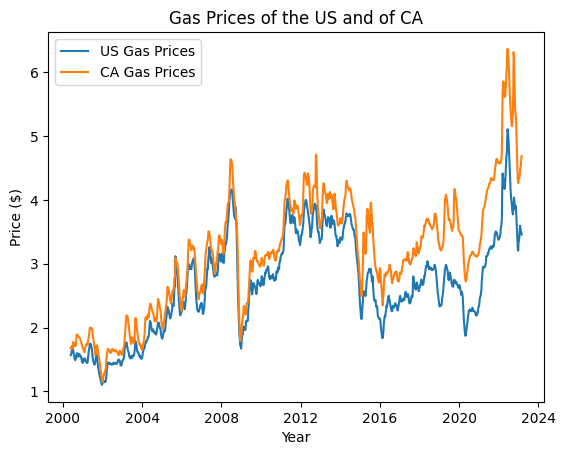

In [27]:
#create seaborn lineplots for the US gas prices and the CA gas prices
sns.lineplot(data=df,x="date",y="price_us",label="US Gas Prices")
sns.lineplot(data=df,x="date",y="price_ca",label="CA Gas Prices")

#set title of the plot and include legend
plt.title("Gas Prices of the US and of CA")
plt.legend()

#change x and y axis labels
plt.xlabel("Year")
plt.ylabel("Price ($)")

#show plot
plt.show()

From the line chart, we can see that prices have definitely increased over the past 20 years. There have been a few notable spikes and drops in the gas prices, but it is safe to say that there is an upward trend in the prices. There is a strong correlation between the prices of California and of the US. However, we can see that there has been a separation between the prices since the beginning of the dataset, and it seems that the separation is increasing. We can take a closer look at that. 

### EDA: Analysis of Difference in Gas Prices Between California and the US
To analyze how the difference in gas prices between California and the US is increasing, we can calculate the difference at each datapoint and then plot a line chart to see if there indeed is a increase.

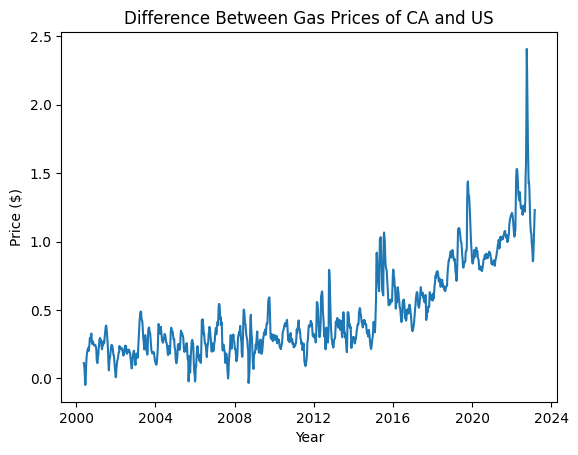

In [28]:
#get difference between CA gas prices and US gas prices
diff = df["price_ca"] - df["price_us"]
df2 = {'year': df['date'],
       'diff': diff}

sns.lineplot(data=df2,x='year',y='diff')

#set title of the plot and include legend
plt.title("Difference Between Gas Prices of CA and US")

#change x and y axis labels
plt.xlabel("Year")
plt.ylabel("Price ($)")

#show plot
plt.show()

As we can see from the plotted line chart, there is data that suggests that California's gas prices are increasing more than that of the US' gas prices. Something interesting to note is that the line chart displays a line that looks similar to that of exponential growth. However, it cannot be certain that there will be an exponential growth in the difference between California's gas prices and the US' gas prices by simply looking at this line chart since the part with exponential growth is of the most recent years. 

### EDA: Analysis of US Inflation from 2000 - 2023
To get a sense of the prices in the U.S., we plot the inflation of the U.S. through out the years.

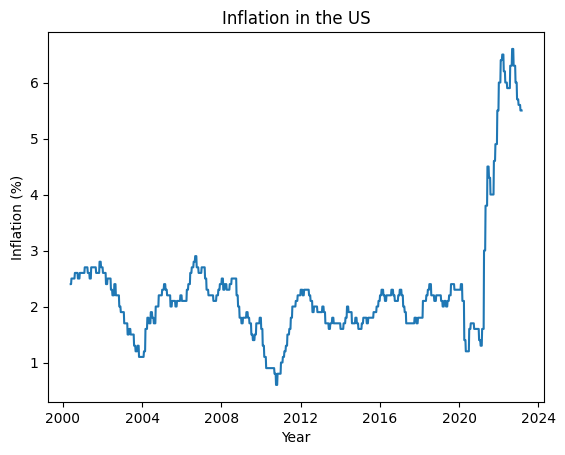

In [29]:
sns.lineplot(data=df,x="date",y="inflation")

#set title of the plot and include legend
plt.title("Inflation in the US")

#change x and y axis labels
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.show()

## Finding correlation between inflation and gas prices in the United States

Before running any tests, lets look at a scatterplot to easily visualize how these inflation and U.S. gas prices are related.

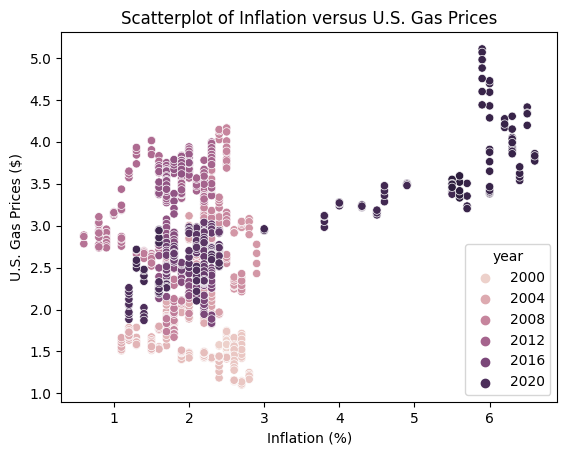

In [48]:
sns.scatterplot(data = df, x = "inflation",y = "price_us",hue = "year")
#set title of the plot and include legend
plt.title("Scatterplot of Inflation versus U.S. Gas Prices")

#change x and y axis labels
plt.xlabel("Inflation (%)")
plt.ylabel("U.S. Gas Prices ($)")

#show plot
plt.show()

In [52]:
## Calculate correlation coeficient and p-value from inflation and U.S. gas prices
print("Correlation Coefficients:" ,pearsonr(df["inflation"].tolist(),df["price_us"].tolist())[0])
print("P-value:" ,pearsonr(df["inflation"].tolist(),df["price_us"].tolist())[1])


Correlation Coefficients: 0.3279060677345459
P-value: 3.352805596218069e-31


Although the correlation coefficient is pretty small, we can see that there is a statistically significant association between inflation and U.S. gas prices since the p-value is incredibly small. Looking at the scatterplot we generated, we can see that a high inflation is related to higher gas prices in the United States.

In [67]:
model_us = sm.OLS(df["price_us"].tolist(),df["inflation"].tolist())
results_us = model_us.fit()
print(results_us.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              5468.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:37:18   Log-Likelihood:                         -1876.8
No. Observations:                1189   AIC:                                      3756.
Df Residuals:                    1188   BIC:                                      3761.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------




In the summary table, we can see that P-value for the parameters is equal to 0. This is not exactly 0, but since we have very larger statistic (73.947) p-value will be approximately 0.

We can see that we can reject the null hypothesis at almost every significance level.



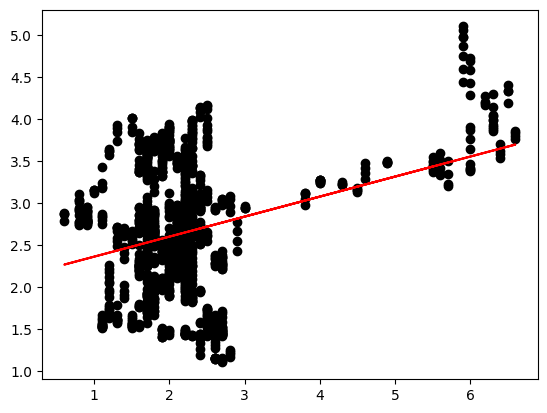

In [78]:
regr_us = linear_model.LinearRegression()
regr_us.fit(df["inflation"].to_numpy().reshape(-1,1),df["price_us"].to_numpy().reshape(-1,1))
gas_us_pred = regr_us.predict(df["inflation"].to_numpy().reshape(-1,1))

plt.scatter(df["inflation"],df["price_us"],color = "black")
plt.plot(df["inflation"],gas_us_pred,color="red")


A simple linear regression analysis can determine if two numeric variables are significantly linearly related.
According to the plot above, it shows we could fit a linear model for the U.S. gas price and inflation, which inflation is positive linearly related to U.S. gas prices. Thus, we reject the null hypothesis again.

## Finding correlation between inflation and gas prices in the California

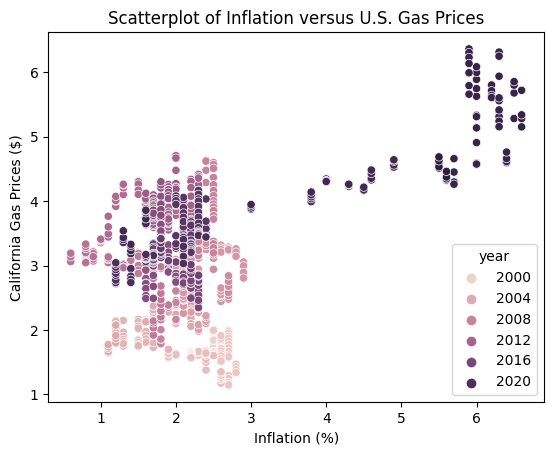

In [80]:
sns.scatterplot(data = df, x = "inflation",y = "price_ca",hue = "year")
#set title of the plot and include legend
plt.title("Scatterplot of Inflation versus California Gas Prices")

#change x and y axis labels
plt.xlabel("Inflation (%)")
plt.ylabel("California Gas Prices ($)")

#show plot
plt.show()

In [81]:
## Calculate correlation coeficient and p-value from inflation and California gas prices
print("Correlation Coefficients:" ,pearsonr(df["inflation"].tolist(),df["price_ca"].tolist())[0])
print("P-value:" ,pearsonr(df["inflation"].tolist(),df["price_ca"].tolist())[1])

Correlation Coefficients: 0.47001149921553764
P-value: 2.2295981993743637e-66


The p value is less than the significant level and is pretty small, we can see that there is a statistically significant association between inflation and the California gas prices. Looking at the scatterplot we generated, we can see that a high inflation is related to higher gas prices in the United States, so there is positive correlation between them and we reject the null hypothesis.

In [82]:
model_ca = sm.OLS(df["price_ca"].tolist(),df["inflation"].tolist())
results_ca = model_ca.fit()
print(results_ca.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              6819.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:49:04   Log-Likelihood:                         -1968.2
No. Observations:                1189   AIC:                                      3938.
Df Residuals:                    1188   BIC:                                      3943.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In the summary table, we can see that P-value for the parameters is equal to 0. This is not exactly 0, but since we have very larger statistic (82.576) p-value will be approximately 0.

We can see that we can reject the null hypothesis at almost every significance level.

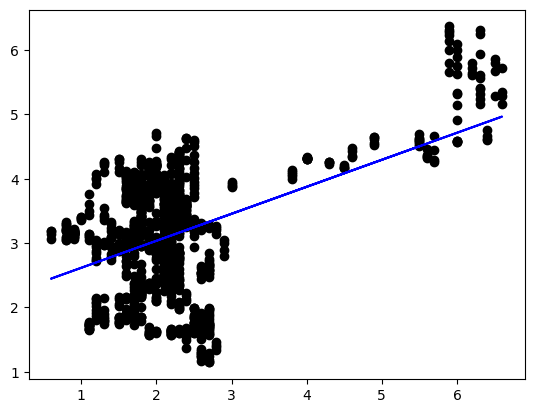

In [85]:
regr_ca = linear_model.LinearRegression()
regr_ca.fit(df["inflation"].to_numpy().reshape(-1,1),df["price_ca"].to_numpy().reshape(-1,1))
gas_ca_pred = regr_ca.predict(df["inflation"].to_numpy().reshape(-1,1))

plt.scatter(df["inflation"],df["price_ca"],color = "black")
plt.plot(df["inflation"],gas_ca_pred,color="blue")


A simple linear regression analysis can determine if two numeric variables are significantly linearly related.
According to the plot above, it shows we could fit a linear model for the California gas price and inflation, which inflation is positive linearly related to California gas prices. Thus, we reject the null hypothesis again.

# Ethics & Privacy

For our project, we will be utilizing three datasets— one containing historical gas prices for California, another containing gas prices for the entirety of the United States, and finally one containing the inflation rate, by month, in the United States. Because the data we are using does not contain any personal information, there are no privacy concerns with the data we have proposed. Additionally, the data we will be using is not subject to collection bias, because the results were not collected via a survey or by any means in which bias could have been introduced.

Despite the absence of these biases, there were still measures our group had to take when working with this data. The main point of concern was that because we were attempting to concretely answer a question about our economy, the data that we used had to be as accurate as possible, and come from a reliable source. Getting data from a source directly involved in the sale of gasoline, such as an oil company, could lead to potential conflict of interest and therefore the reporting of inaccurate data. In order to address this, all the data we worked with is publicly available and pulled directly from US government websites, eliminating our concern of private parties providing incorrect data.

# Conclusion & Discussion

Our initial goal was to find if there was a correlation between inflation and both California's gas prices, and the United States' gas prices. In order to test this hypothesis, we pulled data of gas prices from the US Energy Information Institute, as well as inflation rates from the US Bureau of Labor Statistics. After cleaning this data and isolating our desired columns from each dataset, we calculated the correlation coefficients and P-values between the gas prices and inflation rate, plotted the data to visualize this correlation, and ran OLS regression to view more detailed information about the relationship between the datasets.

Because of a moderate correlation coefficient between US gas prices and inflation, and the slightly higher correlation coefficient between California gas prices and inflation, we can confirm that gas prices for both groups are affected by inflation, with California's prices being more closely correlated. The very low P-values allowed us to reject our null hypothesis, which was that there would be no correlation between gas prices and inflation. Additionally, we observed that the difference between California's gas prices and US gas prices has been steadily increasing.

One limitation for our project is that the data of gas prices for the United States includes the gas prices for California when calculating the mean price, meaning that if we were to find data excluding California, we are likely to have seen a slightly larger difference between California's gas price's correlation with inflation, and that of the United States, given that California had a higher correlation coefficient.

Overall, these conclusions led to several overarching observations about our economy. First, we confirmed that gas prices are impacted by inflation, meaning that the gas industry is an industry fairly strongly swayed by economic strength. Secondly, we found that inflation affects California's gas prices more than the US as a whole, meaning that drivers living in California are impacted by inflation more than the average driver in the US. With inflation continuing to rise, this finding points towards gas prices in California continuing to rise slightly faster compared to other parts of the country. Backing up this claim is our observation that the difference between gas prices in California and the rest of the US is steadily rising, again indicating that the cost of driving a gasoline powered vehicle in California will likely rise faster than the average cost in the United States.

# Team Contributions

Nancy Jiang: Research question, hypothesis, data cleaning, data analysis.

Gideon Chan: Background and Prior Work, datasets, data analysis and visualizations, video

Elliot Kim: Project overview, ethics & privacy, conclusion & discussion, video

Harrison Nguyen: Data analysis, visualizations, data cleaning for inflation, datasets

Jose Mateo: Overview, Hypothesis, Dataset description, Part of video 

# Video Submission Location
Our video can be found in the main directory of our repo, named Group074Video.mp4